In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 모델 생성 과정
#### 성별, 나이, 연봉을 변수로 차를 사는지 안사는지 예측하는 classifier를 만들었다(Logistic Regression 이용)

In [15]:
##import the dataset
dataset = pd.read_csv("C:\\Users\\HS\\Documents\\GitHub\\2018summerBoAZ\\Python\\data\\Social_Network_Ads.csv")
X  = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

##Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

#normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Fitting the Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
y_pred ## y_pred는 내가 모델을 통해 예측해낸 값 이것이 실제 값과 일치할까??
       ## cross validation을 통해 한눈에 볼 수 있다!

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## 1. Confusion Matrix

In [17]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm
## 65 와 24는 각각 1을 1로 0을 0으로 예측을 성공해낸 개수!
## 나머지 3과 8은 예측을 실패한 개수!
## 성공률은 89/100  = 89%

array([[65,  3],
       [ 8, 24]], dtype=int64)

## 2. ROC_curve

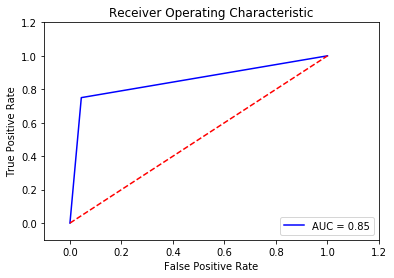

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
## 세로축은 True Positive의 비율 : 차를 산 사람을 정확히 예측
## 가로축은 False Positive의 비율 : 차를 안산 사람을 샀다고 잘못예측한 비율 

#### Precision, recall, fscore, support를 한번에 뽑을 수 있다

In [20]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test,y_pred)

In [21]:
print('precision: ' +str(precision[0]))
print('recall: ' +str(recall[0]))
print('fscore: ' +str(fscore[0]))
print('support: ' +str(support[0]))

precision: 0.8904109589041096
recall: 0.9558823529411765
fscore: 0.9219858156028369
support: 68


## 3. Cross Validation 

In [22]:
#이전에 anaconda prompt 열고 pip install mglearn

In [23]:
import mglearn #그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 해주는 유틸리티 함수

In [24]:
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


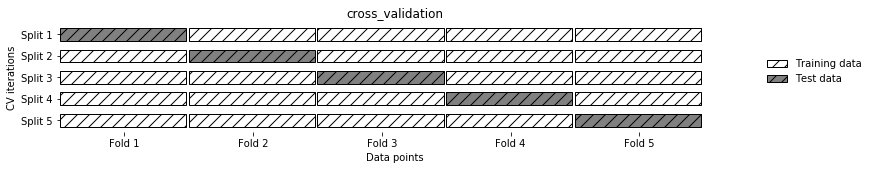

In [25]:
mglearn.plots.plot_cross_validation()
plt.show()

### Cross-validation in scikit-learn

주어진 데이터를 쪼개어 일부는 학습을 시켜 모델을 만드는데 사용하고(training data),
일부는 모델을 검증하는데 사용하는 방법(test data)

- 과적합(overfitting)을 피하기 위해서 사용한다. 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [27]:
iris = load_iris()

In [28]:
logreg = LogisticRegression()

In [29]:
#cv는 fold개수 
scores = cross_val_score(logreg, iris.data, iris.target,cv=5)

In [30]:
print("cross-validation scores: ", scores) 

cross-validation scores:  [1.         0.96666667 0.93333333 0.9        1.        ]


In [31]:
scores.mean() #교차 검증의 정확도를 보는 일반적인 방법은 평균을 계산하는 것이다.

0.9600000000000002

## 4. Grid Search

- 모델의 성능을 최대로 높여주는 매개변수 값을 찾아야 할 때 
- Grid Search : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도한다. 

In [32]:
#간단한 그리드 서치 구현
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [33]:
iris = load_iris() #iris data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("training set의 크기:%d, test set의 크기:%d" % (X_train.shape[0], X_test.shape[0]))
# array.shape => array의 행과 열의 개수를 튜플로 반환

training set의 크기:112, test set의 크기:38


In [34]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # test set으로 SVC 평가
        score = svm.score(X_test, y_test)
        
        # 점수가 더 높으면 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)
        

최고 점수(모델 정확도): 0.9736842105263158
최적 매개변수: {'C': 100, 'gamma': 0.001}


### 4-1. 매개변수 overfitting의 위험성과 evalution set (검증 세트)

위 예시에서는 모델의 정확도가 97%임을 확인할 수 있다. 
하지만 이는 test set에 overfitting된 모델일 수 있다. 
따라서 평가를 위해서 모델을 만들 때 사용하지 않은 독립된 data set이 필요하다. 

이를 위해 data set을 
1. training set: 모델 만들기
2. validation set: 모델의 매개변수 선택
3. test set: 선택된 매개변수의 성능 평가

3개의 set으로 나눈다. 

In [35]:
import mglearn
import matplotlib.pyplot as plt

threefold_split


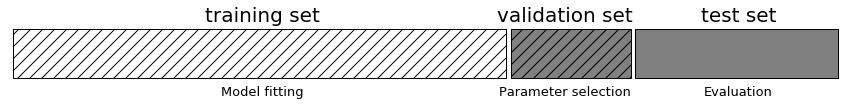

In [36]:
print("threefold_split")
mglearn.plots.plot_threefold_split()
plt.show()

In [37]:
# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


size of training set: 84,  size of validation set: 28,  size of test set: 38


In [38]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [39]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

validation set에서 최고 점수:  0.9642857142857143
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 test set의 점수(모델 정확도):  0.9210526315789473


validation set의 정확도는 약 96.4%로 앞의 결과보다 약간 낮아짐.
(데이터를 한번 더 나누었기 때문에 X.train이 더 작아졌기 때문)
실제 봐야하는 모델 정확도는 이보다 더 작은 약 92.1%이다. 

### 4-2. 교차 검증을 이용한 Grid search

더 향상된 성능을 위해 단순히 training, validation set으로 나누는 것이 아니라 교차 검증을 이용하여 매개변수 간 결합을 평가한다. 

교차 검증을 이용한 grid search는 많이 사용되므로 scikit-learn은 이를 사용할 수 있는 **GridSearchCV**를 이용한다. 

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} 
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 100, 'gamma': 0.01}
최상 교차검증 점수 :  0.9732142857142857
최고 성능 모델 :  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### *교차검증 분석하기 

교차 검증의 결과를 시각화하면 매개변수가 모델의 일반화에 얼마나 영향을 주는지 이해할 수 있다. 

In [42]:
import pandas as pd
from IPython.display import display

In [43]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001201,3.890942e-04,0.000000,0.000000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000593,4.844561e-04,0.000802,0.000401,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000799,3.993122e-04,0.000000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000602,4.916614e-04,0.000000,0.000000,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000598,4.884608e-04,0.000399,0.000489,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
5,0.000598,4.881514e-04,0.000597,0.000487,0.001,100,"{'C': 0.001, 'gamma': 100}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
6,0.000998,6.309020e-04,0.000200,0.000399,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
7,0.000797,3.983781e-04,0.000598,0.000488,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
8,0.000997,1.451027e-06,0.000598,0.000489,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
9,0.000796,7.428019e-04,0.000399,0.000489,0.01,1,"{'C': 0.01, 'gamma': 1}",0.375000,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


2차원의 매개변수 grid를 가지므로 히트맵(heat map)을 이용하여 시각화 한다. 
x축에 'gamma', y축에 'C', 각 격자안에 교차 검증의 평균값을 입력한다. 

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


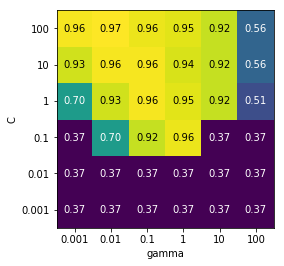

In [44]:
scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()